# **Problem Statement 2 EVYD Technology in Microsoft; Code Without Barrier Hackathon 2024**

# 1. Import Libraries and Dataset

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [69]:
df = pd.read_csv("./diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
pd.set_option('display.max_columns', None)
df.head(6)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
5,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,7.0,0.0,0.0,0.0,1.0,4.0,7.0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [71]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,70692.0,0.500000,0.500004,0.0,0.0,0.5,1.0,1.0
HighBP,70692.0,0.563458,0.495960,0.0,0.0,1.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
Stroke,70692.0,0.062171,0.241468,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0


In [72]:
pd.set_option('display.max_colwidth', None)
list_item=[]
for col in df.columns:
    list_item.append([col, df[col].nunique(), df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),df[col].unique()])
tabel1 = pd.DataFrame(columns=['column', 'unique values count', 'data type', 'null count', 'null percentage', 'unique data'], data= list_item)
tabel1

,column,unique values count,data type,null count,null percentage,unique data
0,Diabetes_binary,2,float64,0,0.0,"[0.0, 1.0]"
1,HighBP,2,float64,0,0.0,"[1.0, 0.0]"
2,HighChol,2,float64,0,0.0,"[0.0, 1.0]"
3,CholCheck,2,float64,0,0.0,"[1.0, 0.0]"
4,BMI,80,float64,0,0.0,"[26.0, 28.0, 29.0, 18.0, 31.0, 32.0, 27.0, 24.0, 21.0, 58.0, 30.0, 20.0, 22.0, 38.0, 40.0, 25.0, 36.0, 47.0, 19.0, 37.0, 41.0, 23.0, 34.0, 35.0, 42.0, 17.0, 33.0, 44.0, 15.0, 52.0, 69.0, 56.0, 45.0, 39.0, 92.0, 53.0, 98.0, 50.0, 46.0, 79.0, 48.0, 16.0, 63.0, 72.0, 54.0, 49.0, 68.0, 43.0, 84.0, 73.0, 76.0, 55.0, 51.0, 75.0, 57.0, 60.0, 12.0, 77.0, 82.0, 67.0, 71.0, 61.0, 14.0, 81.0, 59.0, 86.0, 13.0, 87.0, 65.0, 95.0, 89.0, 62.0, 64.0, 66.0, 85.0, 70.0, 83.0, 80.0, 78.0, 74.0]"
5,Smoker,2,float64,0,0.0,"[0.0, 1.0]"
6,Stroke,2,float64,0,0.0,"[0.0, 1.0]"
7,HeartDiseaseorAttack,2,float64,0,0.0,"[0.0, 1.0]"
8,PhysActivity,2,float64,0,0.0,"[1.0, 0.0]"
9,Fruits,2,float64,0,0.0,"[0.0, 1.0]"


# 2. Data Cleaning

In [73]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [74]:
df.duplicated().sum()

1635

In [75]:
df.drop_duplicates()
df.shape

(70692, 22)

# 3. Exploratory Data Analysis (EDA)

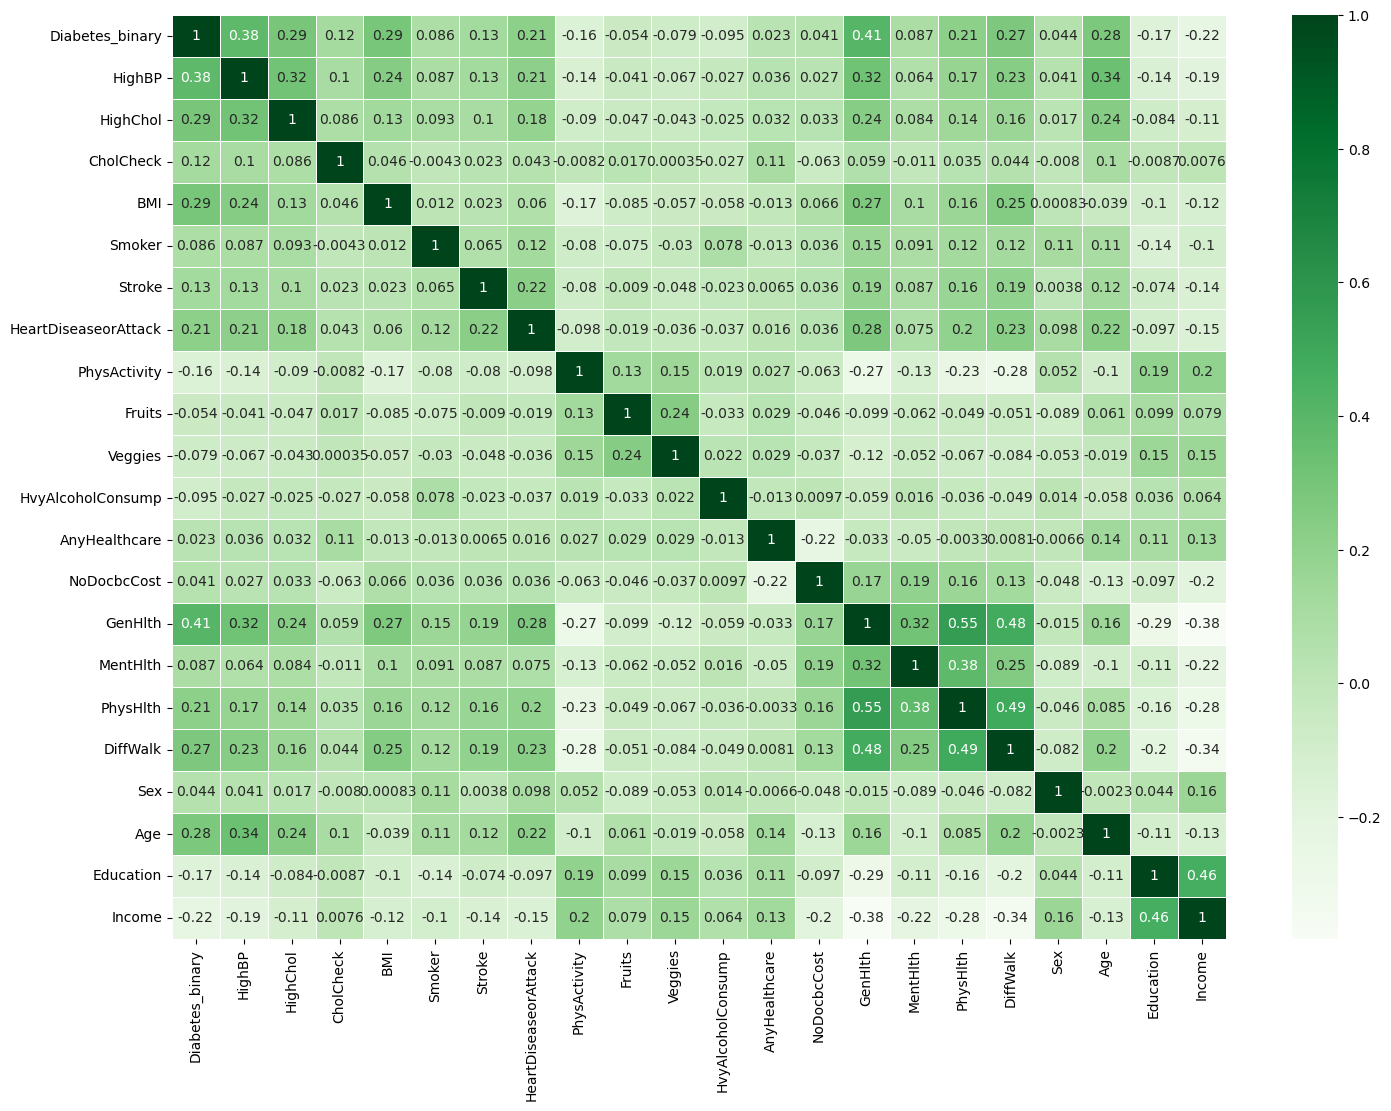

In [10]:
plt.figure(figsize=(17, 12))
cols_num = [col for col in df.columns]
sns.heatmap(df.corr(), annot=True, cmap='Greens', linewidths = 0.7,linecolor='white')
plt.show();

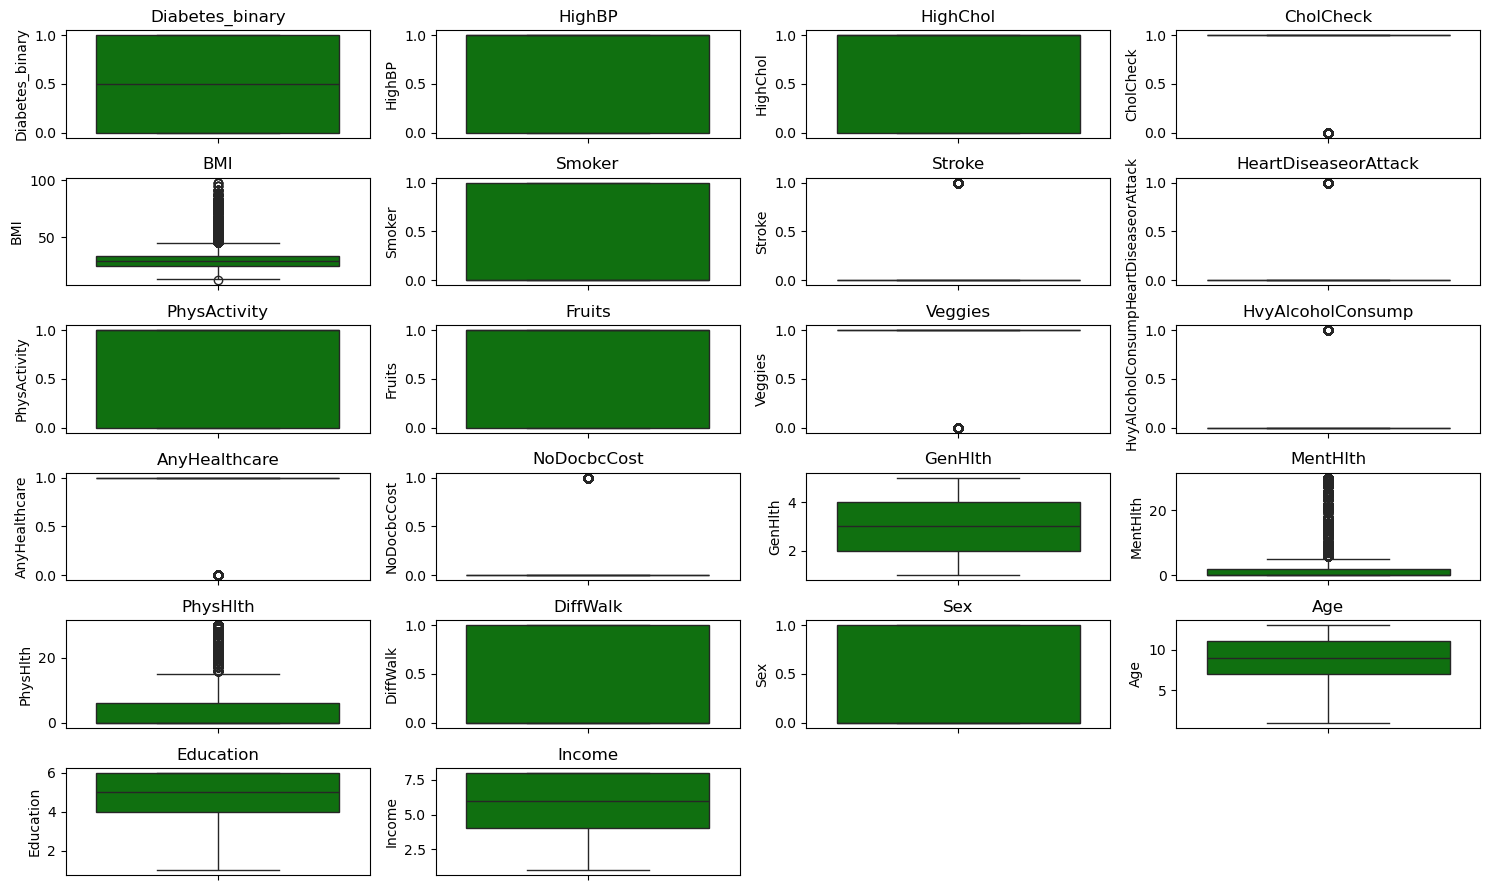

In [11]:
plt.figure(figsize=(15, 9))

for index, col in enumerate(cols_num, 1):
    plt.subplot(6, 4, index)
    sns.boxplot(df[col], color='green')
    plt.title(col)
plt.tight_layout()
plt.show();

plt.figure(figsize=(15, 6))

for index, col in enumerate(cols_num, 1):
    plt.subplot(6, 4, index)
    sns.countplot(df[col], color='green')
    plt.title(col)
plt.tight_layout()
plt.show()

# 4. Feature Selection

## X and y

In [12]:
X = df.drop(columns = 'Diabetes_binary')
y = df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

print(f'X_train shape {X_train.shape}, X_test shape {X_test.shape}')
print(f'y_train shape {y_train.shape}, y_test shape {y_test.shape}')

X_train shape (49484, 21), X_test shape (21208, 21)
y_train shape (49484,), y_test shape (21208,)


In [13]:
f_pvalue = chi2(X_train, y_train)
f_pvalue

(array([3.15158778e+03, 1.98453141e+03, 1.63420534e+01, 7.20976052e+03,
        1.86704574e+02, 7.51941561e+02, 1.86784045e+03, 3.42822306e+02,
        5.45754681e+01, 7.24324298e+01, 4.30283623e+02, 1.10766148e+00,
        6.91582079e+01, 3.56576360e+03, 6.32354617e+03, 3.85759808e+04,
        2.73484215e+03, 4.80488804e+01, 3.65588154e+03, 3.06059529e+02,
        2.04670917e+03]),
 array([0.00000000e+000, 0.00000000e+000, 5.28774167e-005, 0.00000000e+000,
        1.66603319e-042, 1.51787886e-165, 0.00000000e+000, 1.54963667e-076,
        1.49591394e-013, 1.72850042e-017, 1.40980034e-095, 2.92590857e-001,
        9.08733897e-017, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 4.15724945e-012, 0.00000000e+000, 1.57633049e-068,
        0.00000000e+000]))

In [14]:
pvalue = pd.Series(f_pvalue[1])
pvalue.index = X_train.columns
pvalue.sort_values(ascending=True)

HighBP                   0.000000e+00
Age                      0.000000e+00
DiffWalk                 0.000000e+00
PhysHlth                 0.000000e+00
MentHlth                 0.000000e+00
GenHlth                  0.000000e+00
Income                   0.000000e+00
BMI                      0.000000e+00
HighChol                 0.000000e+00
HeartDiseaseorAttack     0.000000e+00
Stroke                  1.517879e-165
HvyAlcoholConsump        1.409800e-95
PhysActivity             1.549637e-76
Education                1.576330e-68
Smoker                   1.666033e-42
Veggies                  1.728500e-17
NoDocbcCost              9.087339e-17
Fruits                   1.495914e-13
Sex                      4.157249e-12
CholCheck                5.287742e-05
AnyHealthcare            2.925909e-01
dtype: float64

- H0 : fitur dan target TIDAK berhubungan signifikan secara statistik 
- H1 : fitur dan target berhubungan signifikan secara statistik 

pada feature **AnyHealthcare**, p value  > 0,05 , **gagal menolak H0**, yang artinya feature ini **tidak punya** cukup bukti bahwa fitur ada hubungannya dengan column target (less significant)

In [16]:
df = df.drop(columns ='AnyHealthcare')
df.shape

(70692, 21)

## Elbow Method

In [17]:
feature = df.drop(columns='Diabetes_binary').columns
target  = 'Diabetes_binary'

In [61]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[feature])

list_n_clusters = range(1,8)
list_inertia = []

for i in list_n_clusters:

    # define algo
    kmeans = KMeans(n_clusters=i, random_state=42) 

    # fit
    kmeans.fit(df_scaled)

    # kmeans memberi nama cluster pada tiap data poin
    kmeans.labels_ 

    # inertia
    inertia = kmeans.inertia_
    list_inertia.append(inertia)

df_inertia = pd.DataFrame()
df_inertia['n_cluster'] = list_n_clusters
df_inertia['inertia'] = list_inertia
df_inertia

,n_cluster,inertia
0,1,183455.536410
1,2,159154.729662
2,3,147204.420835
3,4,137440.012086
4,5,131125.626410
5,6,128171.095046
6,7,124457.591907


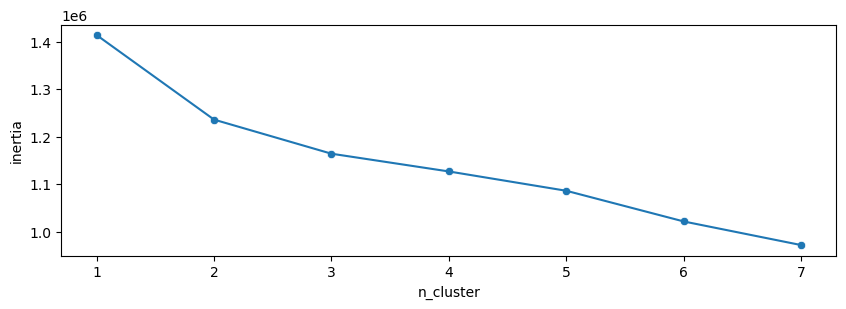

In [27]:
plt.figure(figsize=(10,3))
sns.scatterplot(data = df_inertia, x = 'n_cluster', y ='inertia')
sns.lineplot(data = df_inertia, x = 'n_cluster', y = 'inertia');

kmeans = KMeans(n_clusters=7, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)
df.head()

## Silhouette_score

In [54]:
score = silhouette_score(df_scaled, df['Diabetes_binary'])

print("Silhouette Score:", score)

Silhouette Score: 0.04449140345675054


In [35]:
list_n_clusters = range(2, 8)
list_sil = []

for i in list_n_clusters:

    # define algo
    kmeans = KMeans(n_clusters=i, random_state=42) 

    # fit
    kmeans.fit(df_scaled)

    # kmeans memberi nama cluster pada tiap data poin
    cluster_name = kmeans.labels_ 
    sil = silhouette_score(df_scaled, cluster_name)
    list_sil.append(sil)

df_silhouette = pd.DataFrame(list_sil, columns = ['silhouette score'])
df_silhouette['n_clusters'] = list(list_n_clusters)
df_silhouette

,silhouette score,n_clusters
0,0.166223,2
1,0.079623,3
2,0.068730,4
3,0.076314,5
4,0.085469,6
5,0.092962,7


Based on the elbow method and silhouette score, the **optimal number of clusters for this dataset is 2**

In [64]:
continuous_features = ['BMI', 'MentHlth', 'PhysHlth',  'GenHlth']
discrete_features = [
    'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex', 'Age',
    'Education', 'Income']

In [76]:
continuous_scaled = scaler.fit_transform(df[continuous_features])

df_continuous_scaled = pd.DataFrame(continuous_scaled, columns = continuous_features)

df_new = pd.concat([df[discrete_features], df_continuous_scaled], axis=1)
df_new.head(3)

,Diabetes_binary,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex,Age,Education,Income,BMI,MentHlth,PhysHlth,GenHlth
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,6.0,8.0,0.162791,0.166667,1.000000,0.5
1,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,12.0,6.0,8.0,0.162791,0.000000,0.000000,0.5
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,13.0,6.0,8.0,0.162791,0.000000,0.333333,0.0


In [93]:
kmeans_2clust = KMeans(n_clusters=2, random_state=42)
kmeans_2clust.fit_predict(df_new)

df_new['n_cluster'] = kmeans_2clust.labels_
df_new['n_cluster'].value_counts()

n_cluster
1    42767
0    27925
Name: count, dtype: int64

In [78]:
df['Diabetes_binary'].value_counts()

Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64

**There is a difference** between the 'Diabetes_binary' column and the 'n_cluster' column, which is the result of KMeans clustering

# 5. Profiling each Cluster

In [81]:
df_new.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex',
       'Age', 'Education', 'Income', 'BMI', 'MentHlth', 'PhysHlth', 'GenHlth',
       'n_cluster'],
      dtype='object')

In [94]:
cluster_summary = df_new.groupby('n_cluster')[feature].agg(['mean']).reset_index()
pd.set_option('display.max_columns', None)
display(cluster_summary)

,n_cluster,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,0.369060,0.386321,0.958496,0.208436,0.405013,0.025210,0.055184,0.759606,0.592014,0.808738,0.056150,0.124118,0.397001,0.141319,0.147139,0.138621,0.458084,5.747108,5.078603,6.350295
1,1,0.690392,0.616714,0.986204,0.207119,0.521149,0.086305,0.208291,0.666098,0.624711,0.775738,0.033951,0.074193,0.499930,0.114457,0.224070,0.327238,0.456286,10.436458,4.818014,5.272593


In [95]:
cluster_summary.corr()

,,n_cluster,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
,,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
n_cluster,,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0
HighBP,mean,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0
HighChol,mean,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0
CholCheck,mean,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0
BMI,mean,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0
Smoker,mean,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0
Stroke,mean,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0
HeartDiseaseorAttack,mean,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0
PhysActivity,mean,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0


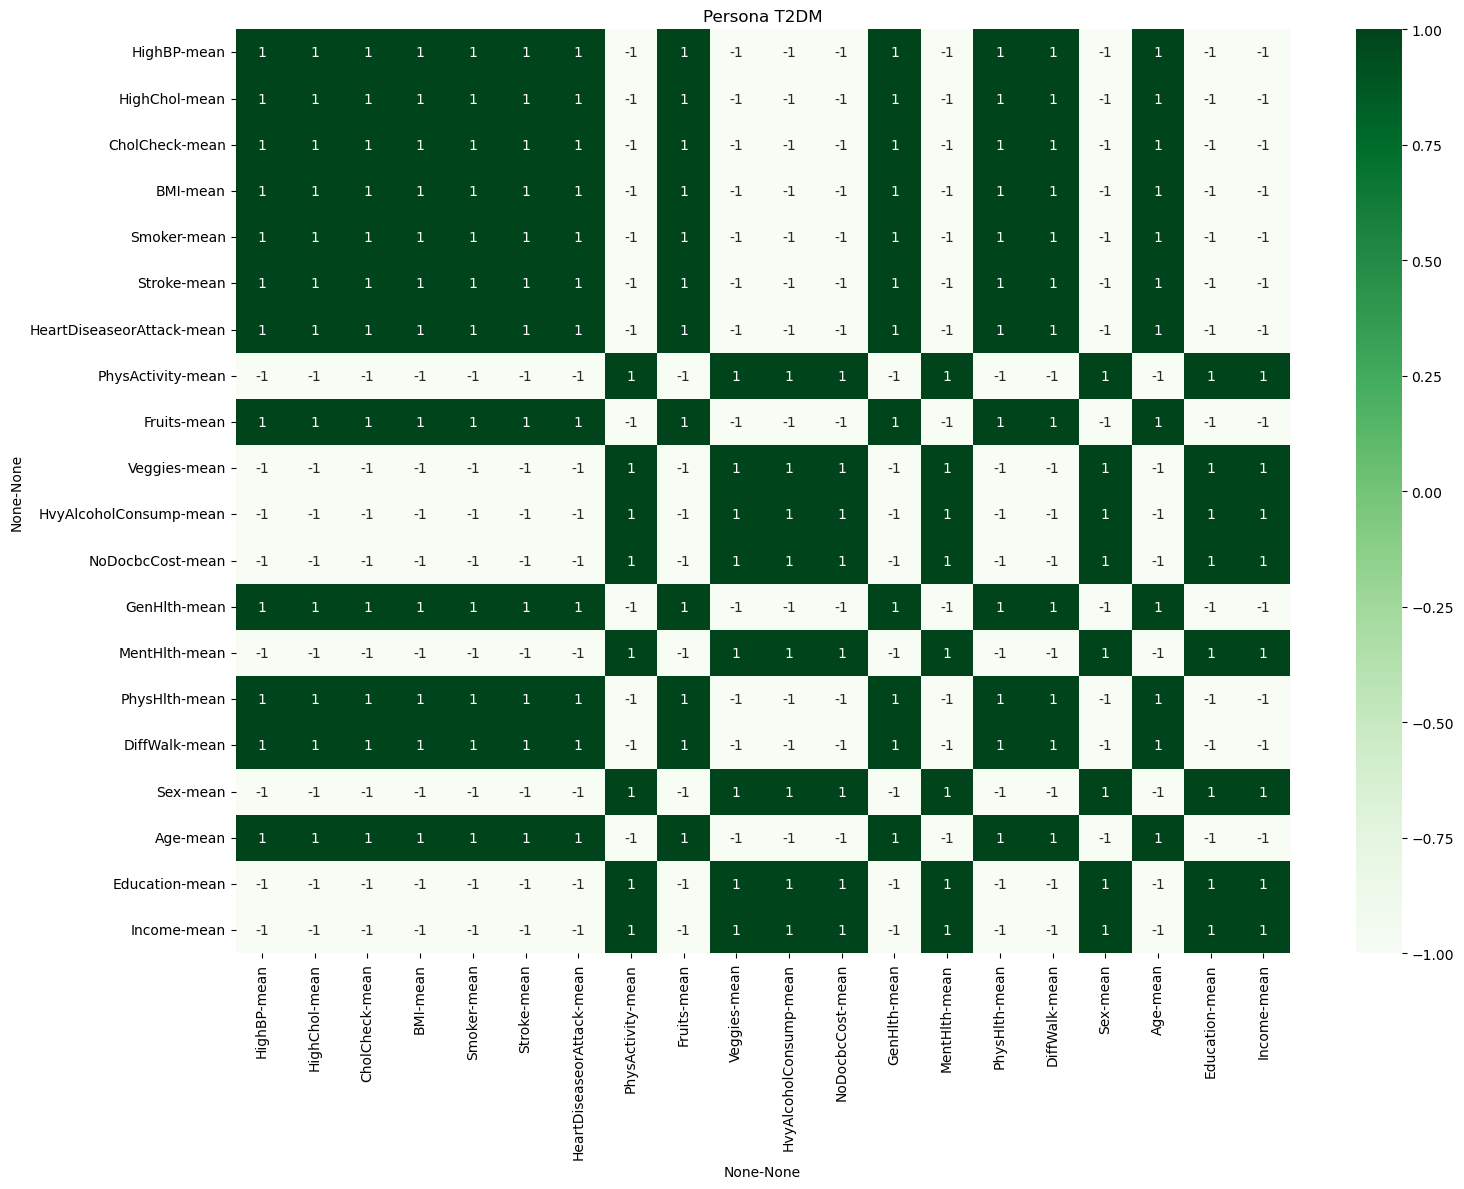

In [84]:
plt.figure(figsize=(17, 12))
sns.heatmap(cluster_summary.corr(), annot=True, cmap='Greens')
plt.title('Persona T2DM')
plt.show();

In [104]:
def describe_clusters(df, cluster_col, features):
    """
    Display a description of each cluster by comparing the average of features in the cluster
    with the global average.

    Parameters:
    - df: DataFrame containing the original data including the cluster column
    - cluster_col: name of the cluster column (e.g., 'n_cluster')
    - features: list of numeric feature columns to compare

    Output:
    - Dictionary of descriptions per cluster
    """
    global_means = df[features].mean()
    cluster_descriptions = {}

    for cluster_id, group in df.groupby(cluster_col):
        cluster_means = group[features].mean()
        desc = []
        for feature in features:
            diff = cluster_means[feature] - global_means[feature]
            direction = "higher" if diff > 0 else "lower"
            desc.append(f"{feature}: {direction} than average (Δ = {diff:.2f})")
        cluster_descriptions[cluster_id] = desc

    return cluster_descriptions


In [105]:
description = describe_clusters(df_new, 'n_cluster', feature)

pd.set_option('display.max_rows', None)

for cluster, lines in description.items():
    print(f"\nCluster {cluster}:")
    for line in lines:
        print(f"- {line}")


Cluster 0:
- HighBP: lower than average (Δ = -0.19)
- HighChol: lower than average (Δ = -0.14)
- CholCheck: lower than average (Δ = -0.02)
- BMI: higher than average (Δ = 0.00)
- Smoker: lower than average (Δ = -0.07)
- Stroke: lower than average (Δ = -0.04)
- HeartDiseaseorAttack: lower than average (Δ = -0.09)
- PhysActivity: higher than average (Δ = 0.06)
- Fruits: lower than average (Δ = -0.02)
- Veggies: higher than average (Δ = 0.02)
- HvyAlcoholConsump: higher than average (Δ = 0.01)
- NoDocbcCost: higher than average (Δ = 0.03)
- GenHlth: lower than average (Δ = -0.06)
- MentHlth: higher than average (Δ = 0.02)
- PhysHlth: lower than average (Δ = -0.05)
- DiffWalk: lower than average (Δ = -0.11)
- Sex: higher than average (Δ = 0.00)
- Age: lower than average (Δ = -2.84)
- Education: higher than average (Δ = 0.16)
- Income: higher than average (Δ = 0.65)

Cluster 1:
- HighBP: higher than average (Δ = 0.13)
- HighChol: higher than average (Δ = 0.09)
- CholCheck: higher than aver

# 6. Summary

🔹 Cluster 0 

- Cluster 0 mainly consists of younger individuals who tend to have lower blood pressure and cholesterol, along with higher education and income levels. Key characteristics:

- Generally healthier: Lower risk of heart disease, stroke, and smoking behavior.

- More physically active: Slightly higher physical activity levels.

- Mixed healthy habits: Slightly lower fruit intake but slightly higher vegetable consumption.

- Mental and physical health: Slightly better mental health (mentHlth↑), but slightly worse physical health (physHlth↓, diffWalk↓).

- Healthcare access: More individuals avoid doctor visits due to cost (NoDocbcCost↑).

🔹 Cluster 1 

- Cluster 1 tends to consist of older individuals with higher blood pressure, cholesterol, and health risks, and lower education and income levels. Key characteristics:

- More health issues: Higher prevalence of heart disease, stroke, and smoking.

- Less physically active: Slightly lower physical activity.

- Less healthy lifestyle: Slightly lower vegetable consumption; less alcohol consumption compared to Cluster 0.

- Mental and physical health: Slightly worse physical condition (diffWalk↑, physHlth↑), while mental health remains relatively stable.

- More frequent health check-ups: Cost is less of a barrier to seeing a doctor (NoDocbcCost↓).

Cluster 0 consists of non-diabetic individuals, while Cluster 1 consists of people with diabetes